## 1st Code

In [1]:
#do not run these codes

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data=pd.read_csv("Data.csv")
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [28]:
X=data.iloc[ : , :-1].values #Except last column
Y=data.iloc[ : ,-1].values #Only last column

In [29]:
X[1]

array(['Spain', 27.0, 48000.0], dtype=object)

In [30]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [36]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X[:,1:])
X[:,1:]=imputer.transform(X[:,1:])

C:\Users\singl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])

In [34]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [37]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(X).toarray()
labelencoder_y=LabelEncoder()
Y=labelencoder_y.fit_transform(Y)

C:\Users\singl\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\singl\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [38]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
data1=pd.read_csv("Salary_Data.csv")
X1=data1.iloc[:,:-1].values
Y1=data1.iloc[:,1].values
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x1_train,y1_train)
y1_pred=regressor.predict(x1_test)

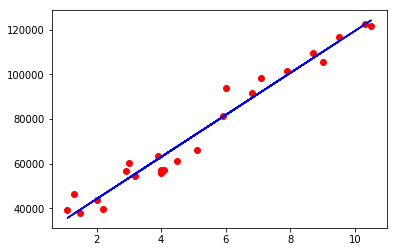

In [42]:
plt.scatter(x1_train,y1_train, color='red')
plt.plot(x1_train, regressor.predict(x1_train),color='blue')
plt.show()

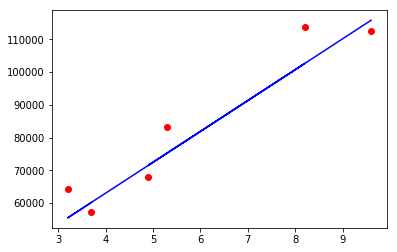

In [43]:
plt.scatter(x1_test,y1_test, color='red')
plt.plot(x1_test,y1_pred,color='blue')
plt.show()

## 2nd Code

In [44]:
data=pd.read_csv("50_Startups.csv")

In [45]:
X=data.iloc[ : , :-1].values
Y=data.iloc[ : ,-1].values

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X[:,3]=labelencoder_X.fit_transform(X[:,3])

In [47]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()
X=X[:,1:]

C:\Users\singl\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\singl\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

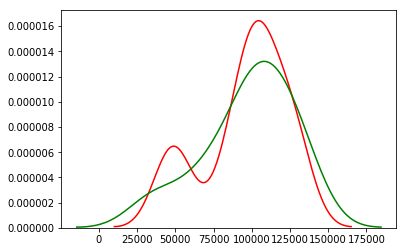

In [50]:
import seaborn as sns
sns.distplot(y_pred, hist=False,color='red')
sns.distplot(y_test, hist=False,color='green')
plt.show()

In [51]:
import statsmodels.formula.api as sm
X=np.append(values=X,arr=np.ones((50,1)).astype(int),axis=1)
X_opt=X[:,[0,1,2,3,4,5]]
regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()
print(regressor_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.34e-27
Time:                        15:18:22   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

In [52]:
X_opt=X[:,[0,1,3,4,5]]
regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()
print(regressor_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           8.49e-29
Time:                        15:18:40   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.0

In [53]:
X_opt=X[:,[0,3,4,5]]
regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()
print(regressor_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           4.53e-30
Time:                        15:18:50   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

In [54]:
X_opt=X[:,[0,3,5]]
regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()
print(regressor_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           2.16e-31
Time:                        15:19:02   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

In [55]:
X_opt=X[:,[0,3]]
regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()
print(regressor_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           3.50e-32
Time:                        15:19:17   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0